## N-Grams Experiment

#### Hypotheses
1. Having more model answers will increase the scoring accuracy of ASAG using N-grams.
2. Using N-Grams with N=(1-3) will be the optimal range.
3. Using N-Grams will model responses which require word order better than set overlap methods. 

In [1]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import exp_libs.ngrams as ng
import libs.preprocessing as pp
import libs.stats as stats
import libs.utils as utils
import libs.semantics.vsm as vsm
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_en = pd.read_csv('../../../datasets/final/en/asag_v2_en_filter.csv', sep='~')
df_en.head(2)

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   
1  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   
1   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   
1  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   
1  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   
1  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   
1   To simulate portions of the desired final pro...        5   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1  
1  correct_complete            NaN    5.0             2             1

## Run 01: N=1, MA_SIZE=1

In [7]:
pipeline_phases = { 'case_normalization' : pp.case_normalization,
                    'punctuation_removal' : pp.punctuation_removal,
                    'stemming' : pp.create_stemmer(pp.EN_STEMMER)}

pipeline = pp.create_pipeline(pipeline_phases, pp.whitespace_tokenize)

In [6]:
count_vec = ng.create_count_vectorizer_fn(pipeline, ngram_range=(1,1), stopwords=pp.EN_STOPS)

/home/che/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


             precision    recall  f1-score   support

        0.0       0.04      1.00      0.08        14
        1.0       0.00      0.12      0.00         8
        2.0       0.08      0.23      0.12       234
        3.0       0.03      0.07      0.04       157
        4.0       0.12      0.03      0.05       676
        5.0       0.75      0.04      0.07       921

avg / total       0.40      0.07      0.07      2010

Pearson's R: 0.3884333605061721
Cohen's Kappa: -0.02389679028248959
MAE: 2.300497512437811
Accuracy: 6.67%
Precision: 39.73%
Recall: 6.67%
F1-Measure: 6.78%
Stored 'exp1_data' (dict)


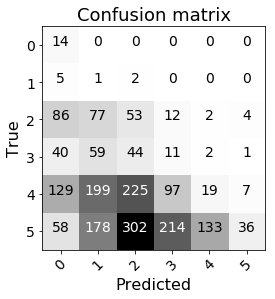

In [36]:
reload(ng)

# Create count vectorizer

scorer1 = ng.create_ngram_scorer(pipeline, ngrams=1, stopwords=pp.EN_STOPS, weights=[1])

results = ng.evaluate_func(df_en, scorer1, ma_size=1)
stats.print_all_stats(results['y_true'], results['y_pred'])
exp1_data = stats.get_all_stats(results['y_true'], results['y_pred'])
%store exp1_data
stats.plot_confusion_matrix(stats.cm(results['y_true'], results['y_pred']), classes=np.arange(6))

## Run 02: N=2, MA_SIZE=1

/home/che/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


             precision    recall  f1-score   support

        0.0       0.04      1.00      0.08        14
        1.0       0.00      0.12      0.00         8
        2.0       0.09      0.20      0.12       234
        3.0       0.04      0.09      0.06       157
        4.0       0.24      0.06      0.09       676
        5.0       0.84      0.14      0.24       921

avg / total       0.48      0.12      0.16      2010

Pearson's R: 0.3963106696330504
Cohen's Kappa: 0.01358437155046932
MAE: 2.119900497512438
Accuracy: 11.99%
Precision: 47.98%
Recall: 11.99%
F1-Measure: 15.83%
Stored 'exp2_data' (dict)


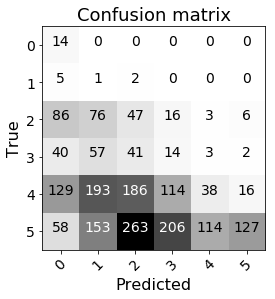

In [84]:
reload(ng)
scorer2 = ng.create_ngram_scorer(pipeline, ngrams=2, stopwords=pp.EN_STOPS, weights=[1,1/2])
results2 = ng.evaluate_func(df_en, scorer2, ma_size=1)
stats.print_all_stats(results2['y_true'], results2['y_pred'])
exp2_data = stats.get_all_stats(results2['y_true'], results2['y_pred'])
%store exp2_data
stats.plot_confusion_matrix(stats.cm(results2['y_true'], results2['y_pred']), classes=np.arange(6))

In [81]:
## Algorithm Debugging

from scipy import spatial
reload(ng)
s1 = 'a function has a name and return type and types of arguments'
s2 = 'a function is not really related at all but it has a return type'
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(tokenizer=pipeline, ngram_range=(1,1), stop_words=pp.EN_STOPS)

count_vec.fit([s1,s2])
print([t for t in pipeline(s2) if not t in pp.EN_STOPS])
print(count_vec.vocabulary_)
k = count_vec.transform([s1,s2]).toarray()
print(k)
print(1 - spatial.distance.cosine(k[0], k[1]))

#print(count_vec_fn(s1,s2))
scorer2 = ng.create_ngram_scorer(pipeline, ngrams=3, stopwords=pp.EN_STOPS, weights=[1,1/3,1/5])
scorer2(s1, s2)

['function', 'realli', 'relat', 'return', 'type']
{'function': 1, 'name': 2, 'return': 5, 'type': 6, 'argument': 0, 'realli': 3, 'relat': 4}
[[1 1 1 0 0 1 2]
 [0 1 0 1 1 1 1]]
0.6324555320336758
0.6324555320336758
0.22360679774997894
0.0
[0.6324555320336758, 0.22360679774997894, 0.0]


0.7069911312836688

## Run 03: N=3, MA_SIZE=1

/home/che/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


             precision    recall  f1-score   support

        0.0       0.04      1.00      0.08        14
        1.0       0.00      0.12      0.00         8
        2.0       0.09      0.20      0.12       234
        3.0       0.04      0.09      0.06       157
        4.0       0.23      0.05      0.08       676
        5.0       0.82      0.15      0.25       921

avg / total       0.47      0.12      0.16      2010

Pearson's R: 0.3965240459289403
Cohen's Kappa: 0.015494221844974287
MAE: 2.1
Accuracy: 12.44%
Precision: 46.54%
Recall: 12.44%
F1-Measure: 16.44%
Stored 'exp3_data' (dict)


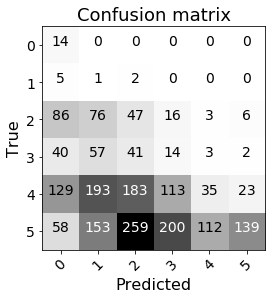

In [85]:
reload(ng)
scorer3 = ng.create_ngram_scorer(pipeline, ngrams=3, stopwords=pp.EN_STOPS, weights=[1,1/2,1/3])
results3 = ng.evaluate_func(df_en, scorer3, ma_size=1)
stats.print_all_stats(results3['y_true'], results3['y_pred'])
exp3_data = stats.get_all_stats(results3['y_true'], results3['y_pred'])
%store exp3_data
stats.plot_confusion_matrix(stats.cm(results3['y_true'], results3['y_pred']), classes=np.arange(6))

## Run 04: N=4, MA_SIZE=1

/home/che/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


             precision    recall  f1-score   support

        0.0       0.04      1.00      0.08        14
        1.0       0.00      0.12      0.00         8
        2.0       0.09      0.20      0.12       234
        3.0       0.04      0.09      0.06       157
        4.0       0.22      0.05      0.08       676
        5.0       0.81      0.15      0.25       921

avg / total       0.46      0.12      0.16      2010

Pearson's R: 0.39625976113830513
Cohen's Kappa: 0.014867674358410632
MAE: 2.099502487562189
Accuracy: 12.39%
Precision: 46.15%
Recall: 12.39%
F1-Measure: 16.35%
Stored 'exp4_data' (dict)


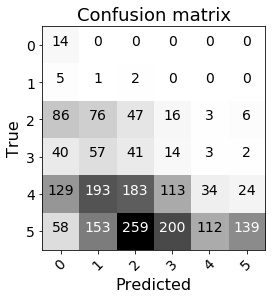

In [87]:
reload(ng)
scorer4 = ng.create_ngram_scorer(pipeline, ngrams=4, stopwords=pp.EN_STOPS, weights=[1,1/2,1/3,1/6])
results4 = ng.evaluate_func(df_en, scorer4, ma_size=1)
stats.print_all_stats(results4['y_true'], results4['y_pred'])
exp4_data = stats.get_all_stats(results4['y_true'], results4['y_pred'])
%store exp4_data
stats.plot_confusion_matrix(stats.cm(results4['y_true'], results4['y_pred']), classes=np.arange(6))

## Does it answer the ordered questions better?

In [89]:
ordered_idxs = df_en['ID'] == 12.3
ordered_qt = results4['y_true'][ordered_idxs]
ordered_qp = results4['y_pred'][ordered_idxs]
stats.print_all_stats(ordered_qt, ordered_qp)
#ng.inspect_results(df_en, results4['y_true'], results4['y_pred'], ordered_idxs, results4['ngrams'])

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        2.0       0.00      0.00      0.00         6
        3.0       0.00      0.00      0.00         2
        4.0       0.00      0.00      0.00         7
        5.0       0.46      0.92      0.62        13

avg / total       0.21      0.43      0.29        28

Pearson's R: 0.28311943606853346
Cohen's Kappa: -0.0205011389521641
MAE: -0.8214285714285714
Accuracy: 42.86%
Precision: 21.43%
Recall: 42.86%
F1-Measure: 28.57%


/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/che/anaconda3/lib/python3.6/site

## Run 05: N=3, MA_SIZE=2 

/home/che/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


             precision    recall  f1-score   support

        0.0       0.08      1.00      0.15        14
        1.0       0.00      0.00      0.00         8
        2.0       0.11      0.25      0.15       234
        3.0       0.03      0.09      0.05       157
        4.0       0.28      0.09      0.14       676
        5.0       0.81      0.25      0.38       921

avg / total       0.48      0.19      0.24      2010

Pearson's R: 0.4555969783748094
Cohen's Kappa: 0.04287469405468469
MAE: 1.6194029850746268
Accuracy: 18.61%
Precision: 48.12%
Recall: 18.61%
F1-Measure: 24.13%
Stored 'exp5_data' (dict)


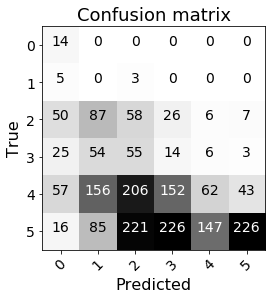

In [91]:
reload(ng)
results5 = ng.evaluate_func(df_en, scorer3, ma_size=2)
stats.print_all_stats(results5['y_true'], results5['y_pred'])
exp5_data = stats.get_all_stats(results5['y_true'], results5['y_pred'])
%store exp5_data
stats.plot_confusion_matrix(stats.cm(results5['y_true'], results5['y_pred']), classes=np.arange(6))

## Run 06: N=3, MA_SIZE=3

/home/che/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


             precision    recall  f1-score   support

        0.0       0.11      1.00      0.20        14
        1.0       0.01      0.38      0.02         8
        2.0       0.12      0.25      0.16       234
        3.0       0.05      0.13      0.07       157
        4.0       0.30      0.12      0.17       676
        5.0       0.79      0.31      0.44       921

avg / total       0.48      0.23      0.29      2010

Pearson's R: 0.4734900639168946
Cohen's Kappa: 0.06817392960602497
MAE: 1.3766169154228856
Accuracy: 22.99%
Precision: 48.39%
Recall: 22.99%
F1-Measure: 28.73%
Stored 'exp6_data' (dict)


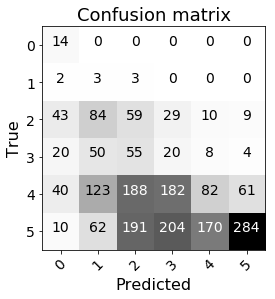

In [92]:
reload(ng)
results6 = ng.evaluate_func(df_en, scorer3, ma_size=3)
stats.print_all_stats(results6['y_true'], results6['y_pred'])
exp6_data = stats.get_all_stats(results6['y_true'], results6['y_pred'])
%store exp6_data
stats.plot_confusion_matrix(stats.cm(results6['y_true'], results6['y_pred']), classes=np.arange(6))

             precision    recall  f1-score   support

          0       0.37      0.73      0.49       477
          1       0.88      0.61      0.72      1533

avg / total       0.76      0.64      0.66      2010

Pearson's R: 0.2864332330427603
Cohen's Kappa: 0.2509196947930419
MAE: 0.23383084577114427
Accuracy: 63.68%
Precision: 75.64%
Recall: 63.68%
F1-Measure: 66.39%


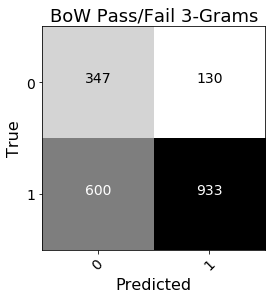

In [93]:
results6_pf = utils.convert_to_pass_fail(results6['y_pred'])
stats.print_all_stats(df_en['Class2_Score'], results6_pf)
exp6_data_pf = stats.get_all_stats(df_en['Class2_Score'], results6_pf)
stats.plot_confusion_matrix(stats.cm(df_en['Class2_Score'], results6_pf), classes=np.arange(2), title='BoW Pass/Fail 3-Grams', savefile='../renderings/bow_ngrams_pass_fail')

In [94]:
#np.unique(df_en['MA'])

## Other Language Tests

ID  AID  QID                                             Prompt  \
0  1.1    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                                  MA  \
0  Um das Verhalten von Teilen des gewünschten So...   

                                                 MA2  \
0  um ein Beispiel und Feedback zur Funktionsweis...   

                                                 MA3  \
0  als Konzeptnachweis dienen und veranschauliche...   

                                          NA  \
0  um Fehler zu finden oder Daten zu sammeln   

                                                  SA  MyScore  \
0  In dem Prototyp-Programm werden Probleme mit h...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

/home/che/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


             precision    recall  f1-score   support

        0.0       0.05      1.00      0.09        14
        1.0       0.00      0.25      0.01         8
        2.0       0.10      0.22      0.13       234
        3.0       0.06      0.12      0.08       157
        4.0       0.32      0.07      0.12       676
        5.0       0.80      0.21      0.33       921

avg / total       0.49      0.16      0.21      2010

Pearson's R: 0.3918115049812517
Cohen's Kappa: 0.04194145711684871
MAE: 1.9701492537313432
Accuracy: 16.17%
Precision: 48.95%
Recall: 16.17%
F1-Measure: 21.25%


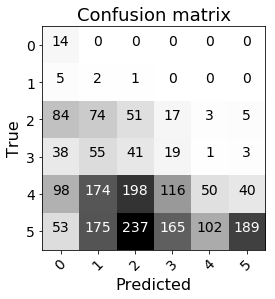

In [95]:
## GERMAN
df_de = pd.read_csv('../../../datasets/final/de/asag_v2_de_filter.csv', sep='~')
display(df_de.head(1))

pipeline_phases = { 'case_normalization' : pp.case_normalization,
                    'punctuation_removal' : pp.punctuation_removal,
                    'remove_stopwords' : pp.create_remove_stopwords(pp.DE_STOPS),
                    'stemming' : pp.create_stemmer(pp.DE_STEMMER)}

pipeline_de = pp.create_pipeline(pipeline_phases, pp.whitespace_tokenize)

scorer3_de = ng.create_ngram_scorer(pipeline_de, ngrams=3, stopwords=pp.DE_STOPS, weights=[1,1/2,1/3])
results_de = ng.evaluate_func(df_de, scorer3_de, ma_size=3)
stats.print_all_stats(results_de['y_true'], results_de['y_pred'])
exp_data_de = stats.get_all_stats(results_de['y_true'], results_de['y_pred'])
stats.plot_confusion_matrix(stats.cm(results_de['y_true'], results_de['y_pred']), classes=np.arange(6))

ID  AID  QID                                             Prompt  \
0  1.1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                                  MA  \
0  Para simular el comportamiento de porciones de...   

                                                 MA2  \
0  para proporcionar un ejemplo y retroalimentaci...   

                                                 MA3  \
0  para servir como prueba de concepto e ilustrar...   

                                         NA  \
0  para encontrar errores o recopilar datos   

                                                  SA  MyScore  \
0  Los problemas de alto riesgo se abordan en el ...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

/home/che/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


             precision    recall  f1-score   support

        0.0       0.07      1.00      0.13        14
        1.0       0.00      0.25      0.01         8
        2.0       0.09      0.20      0.13       234
        3.0       0.04      0.08      0.06       157
        4.0       0.27      0.08      0.13       676
        5.0       0.80      0.27      0.40       921

avg / total       0.47      0.19      0.25      2010

Pearson's R: 0.45625509408857595
Cohen's Kappa: 0.04718999298533022
MAE: 1.725870646766169
Accuracy: 18.81%
Precision: 47.18%
Recall: 18.81%
F1-Measure: 24.60%


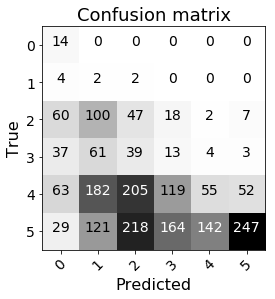

In [97]:
## Spanish
df_es = pd.read_csv('../../../datasets/final/es/asag_v2_es_filter.csv', sep='~')
display(df_es.head(1))

pipeline_phases = { 'case_normalization' : pp.case_normalization,
                    'punctuation_removal' : pp.punctuation_removal,
                    'remove_stopwords' : pp.create_remove_stopwords(pp.ES_STOPS),
                    'stemming' : pp.create_stemmer(pp.ES_STEMMER)}

pipeline_es = pp.create_pipeline(pipeline_phases, pp.whitespace_tokenize)


scorer3_es = ng.create_ngram_scorer(pipeline_de, ngrams=3, stopwords=pp.ES_STOPS, weights=[1,1/2,1/3])
results_es = ng.evaluate_func(df_es, scorer3_es, ma_size=3)
stats.print_all_stats(results_es['y_true'], results_es['y_pred'])
exp_data_de = stats.get_all_stats(results_es['y_true'], results_es['y_pred'])
stats.plot_confusion_matrix(stats.cm(results_es['y_true'], results_es['y_pred']), classes=np.arange(6))